#Project title

# 1. Team work declaration

## Team
| Student           | Id      |
|-------------------|---------|
| Hồ Đăng Khoa              | 2211588 |
| Võ Tấn Việt               | 2433241 |
| Châu Trần Minh Khôi       | 2420005 |
| Võ Hoàng Huy              | 2211299 |
| Huỳnh Bùi Ngọc Khoa       | 2211589 |
| Võ Quốc Bình              | 2112912 |
| Nguyễn Xuân Hy            | 2211409 |
| Trần Tuấn Kha             | 2211418 |


## Workmap declaration

| Last name | Student ID | Design Role | Dev Role | Eval Role | Report Role | Ass1 work description (details in text)  | Rating | week 2 outcome | week 3 outcome | week 4 outcome  |
|-----------|------------|-------------|----------|-----------|-------------|------------------------------------------|-----------------|----------------|----------------|-----------------|
| S1        |2211588            | yes      |  no   | no    | yes     |                                          | A/B/C           |                |                |                 |
| S2        |2433241            | yes      | no   | no    | yes      |                              | A/B/C           |                |                |                 |
| S3        |2420005            | yes      | no   | no    | yes      |                                          | A/B/C           |                |                |                 |
| S4        |2211299            | no      | yes   | no    | yes     |                                          | A/B/C           |                |                |                 |
| S5        |2211589            | no      | yes   | no    | yes      |                                          | A/B/C           |                |                |                 |
| S6        |2112912            | no      | no   | yes    | yes     |                                          | A/B/C           |                |                |                 |
| S7          |2211409      | no             | no         | yes          |  yes           |                                          |      A/B/C           |               |                |                 |
|S8  | 2211418| no             | no          |yes           | yes       |                                          |     A/B/C            |                |                |                 |

## 2. System Design

### System Performance Steps

### 1. Xác định mục tiêu và hệ thống
#### 1.1 Xác định Mục tiêu

Mục tiêu cốt lõi của dự án là thiết kế, hiện thực và đánh giá hiệu năng của hệ thống lập lịch **Hàng đợi Đa cấp Phản hồi (MLFQ)** hoạt động trong môi trường đa nhân. Hệ thống được đánh giá dựa trên sự so sánh với mô hình lý thuyết hàng đợi chuẩn $M/M/c$ (FCFS). Các mục tiêu cụ thể bao gồm:

* **Mô phỏng kiến trúc:** Xây dựng mô hình mô phỏng sự kiện rời rạc cho bộ lập lịch MLFQ 3 cấp độ [RR/RR/FCFS]. Hệ thống phải tái hiện đầy đủ các cơ chế như tranh quyền (preemption), hạ bậc (demotion) và chống đói (anti-starvation).
* **Phân tích định lượng (Quantitative Analysis):** Thiết lập khung đánh giá hiệu năng dựa trên các chỉ số đo lường thực tế từ mô phỏng.
* **Đánh giá hiệu năng:** Sử dụng kết quả tính toán từ lý thuyết hàng đợi $M/M/c$ (Định luật Little) làm **hệ quy chiếu cơ sở (Baseline)** để đánh giá mức độ cải thiện thời gian phản hồi của MLFQ đối với các tác vụ ngắn.

#### 1.2 Xác định hệ thống

Bốn quy tắc cơ bản định nghĩa dịch vụ của một trình lập lịch Đa hàng đợi Phản hồi (MLFQ):

* **Quy tắc 1 (Ưu tiên):** Tác vụ ở hàng đợi ưu tiên cao hơn luôn được chọn thực thi trước tác vụ ở hàng đợi ưu tiên thấp hơn.
* **Quy tắc 2 (Hạ bậc):** Nếu một tác vụ sử dụng hết time slice (quantum) được cấp mà chưa hoàn thành, độ ưu tiên của nó sẽ bị giảm (di chuyển xuống hàng đợi thấp hơn).
* **Quy tắc 3 (Giữ bậc/Ưu tiên tác vụ ngắn):** Nếu tác vụ tự nguyện nhả CPU (hoàn thành hoặc yield) trước khi hết time slice, độ ưu tiên của nó được giữ nguyên. Đây là cơ chế mô phỏng các tác vụ I/O bound (tác vụ ngắn).
* **Quy tắc 4 (Chống đói - Starvation):** Phải tồn tại một cơ chế “tăng ưu tiên” (priority boost). Định kỳ sau một khoảng thời gian $S$, tất cả các tác vụ đang chờ trong hệ thống được di chuyển về hàng đợi ưu tiên cao nhất (Q1).

### 2. Service and Outcomes

Hệ thống mô phỏng MLFQ được tổ chức thành bốn service chính như sau:

#### 2.1 Dịch vụ 1: Khởi tạo môi trường mô phỏng

**Các kết quả có thể xảy ra (Outcomes):**
* Môi trường mô phỏng được khởi tạo với $c$ lõi CPU (SimPy Resource).
* Ba hàng đợi ưu tiên (Q1, Q2, Q3) được tạo và ở trạng thái rỗng.
* Các tham số hệ thống ($\lambda$, $\mu$, thời gian boost $S$, quantum từng mức) được thiết lập sẵn sàng.

#### 2.2 Dịch vụ 2: Tạo và đưa tiến trình vào hệ thống

**Các kết quả có thể xảy ra (Outcomes):**
* Một tiến trình mới được sinh ra với các thuộc tính `pid`, `arrival_time`, `total_cpu_time` (bao gồm cả tiến trình dài và tiến trình ngắn) và được xếp vào hàng đợi ưu tiên cao nhất (Q1).

#### 2.3 Dịch vụ 3: Lập lịch và thực thi trên các lõi CPU

**Các kết quả có thể xảy ra (Outcomes):**
* **Được thực thi (Executed):** Một tiến trình trong hàng đợi được một lõi xử lý (PE) rảnh chọn để thực thi (quét từ Q1 → Q2 → Q3).
* **Hoàn thành (Completed):** Tiến trình chạy xong toàn bộ `total_cpu_time` và rời khỏi hệ thống.
* **Bị ngắt (Preempted):** Một tiến trình đang chạy ở Q2 hoặc Q3 bị một tiến trình Q1 mới đến giành quyền CPU và phải quay trở lại đầu hàng đợi của mình.
* **Nhả CPU sớm (Yield/Short Job):** Tiến trình (mô phỏng I/O) sử dụng chưa hết quantum nhưng tự nguyện nhả CPU. Trạng thái ưu tiên được giữ nguyên theo Quy tắc 3.

#### 2.4 Dịch vụ 4: Quản lý hàng đợi đa cấp và chống đói

**Các kết quả có thể xảy ra (Outcomes):**
* **Bị hạ cấp (Demoted):** Tiến trình chạy hết quantum tại Q1 hoặc Q2 nhưng chưa hoàn thành, bị di chuyển xuống cuối hàng đợi ưu tiên thấp hơn (Q2 hoặc Q3).
* **Được thăng cấp (Boosted):** Các tiến trình **đang chờ** ở hàng đợi thấp (Q2, Q3) được định kỳ di chuyển trở lại Q1 để tránh bị bỏ đói.
* **Tiếp tục chờ (Waits):** Tiến trình nằm trong hàng đợi chờ CPU giải phóng.

### 3. Select Metrics

Dựa trên các outcomes, hệ thống sử dụng các chỉ số đo lường (metrics) sau để đánh giá hiệu năng:

* **Tốc độ (Speed):** Thời gian chờ, thời gian hoàn thành, thời gian phản hồi.
* **Khả dụng (Availability):** Thông lượng hệ thống (Throughput), hiệu suất sử dụng CPU.
* **Tính công bằng (Fairness):** Đảm bảo các tiến trình ở hàng đợi thấp không bị bỏ quên (nhờ cơ chế Boost).

#### 3.1 Bộ thu thập Thống kê (StatisticsCollector)

Lớp `StatisticsCollector` chịu trách nhiệm thu thập dữ liệu thô:

1. `wait_times`: Danh sách lưu **thời gian chờ** của các tiến trình  
  (Waiting Time: tổng thời gian tiến trình nằm trong hàng đợi).

1. `turnaround_times`: Danh sách lưu **tổng thời gian trong hệ thống**  
  (Turnaround Time: từ lúc tiến trình đến cho tới khi hoàn thành – outcome “Completed”).

1. `response_times`: Danh sách lưu **thời gian phản hồi**  
  (Response Time: từ lúc tiến trình đến cho tới khi được CPU phục vụ lần đầu tiên).

Các phương thức tính toán chính:

4. `record_wait_time(time)`: Ghi nhận một giá trị thời gian chờ mới cho một tiến trình.

5. `record_turnaround_time(time)`: Ghi nhận một giá trị turnaround time mới.

6. `record_response_time(time)`: Ghi nhận một giá trị response time mới.

7. `calculate_averages()`: Tính toán và trả về các giá trị trung bình:
  * $W_q$: Thời gian chờ trung bình.
  * $W_s$: Thời gian trong hệ thống trung bình.
  * $R_s$: Thời gian phản hồi trung bình.

#### 3.2 Các chỉ số hiệu năng được lựa chọn

Báo cáo tập trung vào 3 chỉ số chính:

- **Thời gian chờ trung bình $ W_q $**: Được tính từ danh sách `wait_times`. Đo lường độ trễ trước khi được xử lý.

- **Thời gian trong hệ thống trung bình $W_s$**: Phản ánh tổng thời gian tồn tại của tiến trình.

- **Thời gian phản hồi trung bình $R_s$**: Được tính từ `response_times`. Đo lường thời gian từ lúc đến cho đến khi được CPU phục vụ lần đầu. Đây là chỉ số quan trọng nhất để đánh giá hiệu quả của MLFQ đối với các **tác vụ ngắn/tương tác** so với FCFS.

### 4. List System Parameters

Các tham số dưới đây mô tả cấu trúc cố định của hệ thống mô phỏng MLFQ.

| Nhóm              | Tham số                          | Ký hiệu / Giá trị ví dụ | Mô tả ngắn gọn                                                                 |
|-------------------|----------------------------------|--------------------------|--------------------------------------------------------------------------------|
| Cấu trúc hệ thống | Số lõi CPU                      | $c \ge 4$                | Số server trong mô hình $M/M/c$, số lượng tiến trình có thể thực thi song song. |
| Cấu trúc hệ thống | Số mức ưu tiên                  | `NUM_QUEUES = 3`         | Ba hàng đợi ưu tiên Q1, Q2, Q3 với độ ưu tiên giảm dần.                        |
| Workload          | Quá trình đến                   | Poisson($\lambda$)       | Thời điểm đến của tiến trình tuân theo phân phối Poisson với tham số $\lambda$. |
| Workload          | Thời gian phục vụ CPU           | Exp($\mu$)               | Tổng thời gian CPU `total_cpu_time` tuân theo phân phối mũ với tham số $\mu$. |
| Lập lịch          | Quantum mức 1                   | $q_1$                    | Thời lượng tối đa một tiến trình được chạy trên Q1 trước khi bị xem là “hết quantum”. |
| Lập lịch          | Quantum mức 2                   | $q_2$                    | Thời lượng tối đa một tiến trình được chạy trên Q2.                            |
| Lập lịch          | Hàng đợi mức 3                  | $q_3 = \infty$ (FCFS)   | Q3 theo cơ chế FIFO, không giới hạn quantum.                           |
| Lập lịch          | Chu kỳ chống đói (priority boost) | `S_PERIOD`             | Khoảng thời gian giữa hai lần đưa tất cả tiến trình chờ về Q1.                 |
| Mô phỏng          | Thời gian mô phỏng              | `SIM_TIME`              | Tổng thời gian chạy mô phỏng để thu thập số liệu.                              |
| Mô phỏng          | Môi trường mô phỏng             | `env` (SimPy Environment) | Môi trường sự kiện rời rạc dùng để lập lịch các tiến trình, sự kiện.        |
| Mô phỏng          | Tài nguyên CPU                  | `cpu = simpy.Resource(c)` | Tài nguyên CPU tổng với sức chứa $c$, dùng trong SimPy.                       |
| Dữ liệu thống kê  | Bộ thu thập thống kê            | `StatisticsCollector`    | Lưu `wait_times`, `turnaround_times`, `response_times` để tính các metrics.    |


### 5. List Factors to Study
#### 5.1 Arrival rate $ \lambda $ (Tốc độ đến của tiến trình)

- Mô tả: Số tiến trình đến trung bình trong một đơn vị thời gian (Poisson($ \lambda $)).  
- Lý do chọn: Khi $ \lambda $ tăng, hệ thống chịu tải nặng hơn → dự kiến sẽ làm tăng thời gian chờ,
thời gian trong hệ thống và có thể làm giảm throughput/CPU utilization nếu quá tải.  
- Metrics chịu ảnh hưởng: $ W_q $, $ W_s $.

#### 5.2 Số lõi CPU $ c $ (Number of servers)

- Mô tả: Số lượng lõi CPU xử lý song song trong mô hình M/M/c.  
- Lý do chọn: Thay đổi $ c $ cho phép đánh giá tác động của việc tăng/giảm tài nguyên
xử lý lên thời gian chờ và khả năng phục vụ.  
- Metrics chịu ảnh hưởng: $ W_q $, $ W_s $.

#### 5.3 Quantum của các mức ưu tiên ($ q_1, q_2 $)

- Mô tả: Thời lượng CPU tối đa mà một tiến trình được chạy ở Q1 và Q2 trước khi bị xem là hết quantum.  
- Lý do chọn: Quantum nhỏ giúp phản hồi nhanh hơn cho tiến trình ngắn/interactive nhưng làm tăng
số lần preemption và chi phí lập lịch; quantum lớn ưu tiên tiến trình dài hơn nhưng có thể làm
tăng thời gian chờ của tiến trình mới.  
- Metrics chịu ảnh hưởng: , $ W_q $.

#### 5.4 Chu kỳ Priority Boost $ S_{\text{PERIOD}} $

- Mô tả: Khoảng thời gian giữa hai lần hệ thống đưa toàn bộ tiến trình đang chờ về Q1.  
- Lý do chọn: Tham số này điều khiển cơ chế chống đói. Boost quá chậm khiến tiến trình ở Q3
bị chờ lâu; boost quá nhanh làm mất “hiệu lực” phân tầng ưu tiên.  
- Metrics chịu ảnh hưởng: $ W_s $ của các tiến trình dài.

### 6. Evaluation Technique
Trong dự án lần này, phương pháp được lựa chọn để đánh giá hệ thống là:

1.  **Analytical Modeling:** Sử dụng công thức $M/M/c$ làm đường cơ sở (Baseline).
2.  **Discrete-event Simulation:** Sử dụng thư viện SimPy (Python).

### 7. So sánh kết quả mô phỏng với công thức lý thuyết

Để đánh giá hiệu quả của MLFQ, chúng ta sử dụng mô hình lý thuyết $M/M/c$ (tương ứng với lập lịch FCFS/Random) làm **hệ quy chiếu cơ sở (Baseline)**. Ta so sánh các chỉ số
thời gian chờ trung bình $W_q$ và thời gian trong hệ thống trung bình $W_s$
thu được từ mô phỏng với kết quả lý thuyết của hệ thống $M/M/c$ tương ứng,
trong hai kịch bản tải: **tải nhẹ** ($\rho = 0.25$) và **tải nặng** ($\rho = 0.9$).

Đối với hệ thống $M/M/c$, với tốc độ đến $\lambda$, tốc độ phục vụ $\mu$ và
số server $c$, ta có:

- Hệ số tải:
  $$\rho = \frac{\lambda}{c \mu}$$

- Xác suất hệ thống rỗng:
  $$
  P_0 = \left[
    \sum_{n=0}^{c-1} \frac{\left(\frac{\lambda}{\mu}\right)^n}{n!}
    + \frac{\left(\frac{\lambda}{\mu}\right)^c}{c!} \cdot \frac{1}{1-\rho}
  \right]^{-1}
  $$

- Số tiến trình chờ trung bình:
  $$
  L_q = \frac{P_0 \left( \frac{\lambda}{\mu} \right)^c \rho}{c! (1-\rho)^2}
  $$

- Thời gian chờ trung bình (Định luật Little):
  $$
  W_q = \frac{L_q}{\lambda}
  $$

- Thời gian trong hệ thống trung bình:
  $$
  W_s = W_q + \frac{1}{\mu}
  $$

#### 7.1 Kịch bản 1 – Tải nhẹ

**Thông số kịch bản:**

- Tốc độ đến: $\lambda = 1.0 \ \text{(tiến trình/giây)}$
- Tốc độ phục vụ: $\mu = 1.0 \ \text{(1/giây)}$
- Số lõi CPU: $c = 4$

Hệ số tải:
$$
\rho = \frac{\lambda}{c \mu} = \frac{1.0}{4 \cdot 1.0} = 0.25 < 1
$$
Điều kiện ổn định $\rho < 1$ được thỏa mãn.

Áp dụng các công thức trên, ta tính được (giá trị gần đúng):

- Xác suất rỗng: $P_0 \approx 0.3673$
- Số tiến trình chờ trung bình: $L_q \approx 0.0068$
- Thời gian chờ trung bình: $W_q^{\text{theory}} \approx 0.0068 \ \text{s}$
- Thời gian trong hệ thống trung bình:
  $$
  W_s^{\text{theory}} = W_q^{\text{theory}} + \frac{1}{\mu}
  \approx 1.0068 \ \text{s}
  $$


#### 7.2 Kịch bản 2 – Tải nặng

**Thông số kịch bản:**

- Tốc độ đến: $\lambda = 3.6 \ \text{(tiến trình/giây)}$
- Tốc độ phục vụ: $\mu = 1.0 \ \text{(1/giây)}$
- Số lõi CPU: $c = 4$

Hệ số tải:
$$
\rho = \frac{\lambda}{c \mu} = \frac{3.6}{4 \cdot 1.0} = 0.9 < 1
$$
Hệ thống vẫn ổn định nhưng ở vùng tải rất cao (gần bão hòa).

Tính toán lý thuyết:

- Xác suất rỗng: $P_0 \approx 0.011$
- Số tiến trình chờ trung bình: $L_q \approx 7.090$
- Thời gian chờ trung bình: $W_q^{\text{theory}} \approx 1.969 \ \text{s}$
- Thời gian trong hệ thống trung bình:
  $$
  W_s^{\text{theory}} = W_q^{\text{theory}} + \frac{1}{\mu}
  \approx 2.969 \ \text{s}
  $$


## System Component/Module description

# 3. System Implementation



Install prerequisite library


*   simpy



In [ ]:
!pip install simpy

# Common imports

from dataclasses import dataclass, field
from typing import List, Optional, Dict
import random

import simpy
import pandas as pd
import math
import matplotlib.pyplot as plt


%matplotlib inline

## Queuing Node 1

In [ ]:
# =========================
# Queuing Node 1: Process & ProcessQueue
# =========================

@dataclass
class Process:
    """
    Đại diện cho một job trong hệ thống MLFQ.

    Thuộc tính chính:
    - pid: mã tiến trình
    - arrival_time: thời điểm đến hệ thống
    - total_cpu_time: tổng CPU time yêu cầu

    Trạng thái động:
    - current_level: mức ưu tiên (1=Q1, 2=Q2, 3=Q3)
    - cpu_left: CPU time còn lại
    - quantum_left: quantum còn lại trong lần chạy hiện tại
    - start_time: thời điểm lần đầu được cấp CPU
    - finish_time: thời điểm hoàn thành
    """

    pid: int
    arrival_time: float
    total_cpu_time: float
    current_level: int = 1
    cpu_left: float = field(init=False)
    quantum_left: float = field(init=False)
    time_entered_current_queue: float = field(default=0.0)
    start_time: Optional[float] = None
    finish_time: Optional[float] = None
    last_run_start: Optional[float] = None

    def __post_init__(self):
        # Khởi tạo CPU còn lại và quantum
        self.cpu_left = self.total_cpu_time
        self.quantum_left = float("inf")  # sẽ được set bởi scheduler khi được cấp CPU


class ProcessQueue:
    """Hàng đợi đơn giản cho các tiến trình cùng mức ưu tiên."""

    def __init__(self):
        self.queue: List[Process] = []

    def add_to_end(self, p: Process) -> None:
        """Thêm process vào cuối queue (enqueue bình thường)."""
        self.queue.append(p)

    def add_to_head(self, p: Process) -> None:
        """Thêm process vào đầu queue (sau khi preempt)."""
        self.queue.insert(0, p)

    def remove_from_head(self) -> Optional[Process]:
        """Lấy process ở đầu queue (nếu có)."""
        if self.queue:
            return self.queue.pop(0)
        return None

    def is_empty(self) -> bool:
        return not self.queue

    def __len__(self) -> int:
        return len(self.queue)


## Queuing node 2


In [ ]:
# =========================
# Queuing Node 2: StatisticsCollector & Core
# =========================

class StatisticsCollector:
    """
    Thu thập và tính toán các chỉ số hiệu năng:
    - danh sách wait_times
    - danh sách turnaround_times
    - số lần priority boost
    """

    def __init__(self):
        self.wait_times: List[float] = []
        self.turnaround_times: List[float] = []
        self.boost_events: int = 0  # số lần boost

    def record_wait_time(self, t: float) -> None:
        self.wait_times.append(t)

    def record_turnaround_time(self, t: float) -> None:
        self.turnaround_times.append(t)

    def calculate_averages(self) -> Dict[str, float]:
        num = len(self.wait_times)
        avg_wait = sum(self.wait_times) / num if num > 0 else 0.0
        avg_turn = sum(self.turnaround_times) / num if num > 0 else 0.0
        return {
            "average_wait_time": avg_wait,
            "average_turnaround_time": avg_turn,
            "num_jobs": num,
            "boost_events": self.boost_events,
        }


class Core:
    """
    Mô phỏng một lõi CPU.

    Mỗi Core chạy vòng lặp:
    - yêu cầu scheduler cấp một process
    - chạy process trong một khoảng thời gian (min(cpu_left, quantum_left))
    - xử lý các trường hợp hoàn thành, hết quantum, I/O, hoặc preempt.
    """

    def __init__(self, env: simpy.Environment, scheduler: "CPUScheduler", core_id: int):
        self.env = env
        self.scheduler = scheduler
        self.core_id = core_id
        self.current_process: Optional[Process] = None
        # khởi động process mô phỏng
        self.process = env.process(self.run_loop())

    def run_loop(self):
        while True:
            # Hỏi scheduler để lấy process tiếp theo
            p, quantum = self.scheduler.request_next_process(self)
            if p is None:
                # Không có job nào sẵn sàng -> idle một chút
                yield self.env.timeout(0.001)
                continue

            self.current_process = p
            p.quantum_left = quantum

            # Ghi nhận thời điểm bắt đầu lần đầu
            if p.start_time is None:
                p.start_time = self.env.now
                wait_time = p.start_time - p.arrival_time
                self.scheduler.stats.record_wait_time(wait_time)

            # Thời gian chạy thực tế
            run_time = p.cpu_left if p.current_level == 3 else min(
                p.cpu_left, p.quantum_left
            )
            run_time = max(0.0, run_time)
            p.last_run_start = self.env.now

            try:
                # Cho CPU chạy process trong run_time
                yield self.env.timeout(run_time)
            except simpy.Interrupt:
                # Bị preempt
                slice_start = p.last_run_start if p.last_run_start is not None else self.env.now
                consumed = max(0.0, self.env.now - slice_start)
                p.cpu_left = max(0.0, p.cpu_left - consumed)
                p.quantum_left = max(0.0, p.quantum_left - consumed)
                self.scheduler.on_preempt(p)
                self.current_process = None
                continue

            # Kết thúc đoạn chạy mà không bị interrupt
            p.cpu_left = max(0.0, p.cpu_left - run_time)
            p.quantum_left = max(0.0, p.quantum_left - run_time)

            # Xử lý sau đoạn chạy
            if p.cpu_left <= 0:
                # Hoàn thành
                p.finish_time = self.env.now
                turn_time = p.finish_time - p.arrival_time
                self.scheduler.stats.record_turnaround_time(turn_time)
                self.scheduler.on_process_complete(p)
            else:
                # Có thể xuất hiện tác vụ I/O
                if (
                    self.scheduler.io_probability > 0
                    and random.random() < self.scheduler.io_probability
                ):
                    self.scheduler.start_io(p)
                else:
                    # Hết quantum ở Q1/Q2 -> hạ bậc
                    if p.current_level < 3 and p.quantum_left <= 0:
                        self.scheduler.on_quantum_expired(p)
                    else:
                        # Yield nhưng chưa hết quantum -> giữ level
                        self.scheduler.on_process_yield(p)

            self.current_process = None

    def preempt(self) -> None:
        """Gửi interrupt tới core hiện tại (nếu đang chạy process)."""
        if self.current_process is not None:
            self.process.interrupt("preempt")

class TimeSeriesCollector:
  def __init__(self, env):
      self.env = env
      self.timestamps = []
      self.job_counts = []
  def record(self, num_jobs):
      self.timestamps.append(self.env.now)
      self.job_counts.append(num_jobs)

## Queuing node 3


In [ ]:
# =========================
# Queuing Node 3: CPUScheduler, Workload generator, simulate()
# =========================

class CPUScheduler:
    """
    Scheduler trung tâm cho hệ thống MLFQ:
    - 3 queue: Q1, Q2 (RR), Q3 (FCFS)
    - preemption cho job Q1 mới đến
    - priority boost định kỳ
    - optional I/O cho process.
    """

    def __init__(
        self,
        env: simpy.Environment,
        num_cpus: int,
        q1: float,
        q2: float,
        s_period: float,
        io_probability: float = 0.0,
        io_rate: float = 1.0,
    ):
        self.env = env
        self.num_cpus = num_cpus
        self.q1 = q1
        self.q2 = q2
        self.s_period = s_period
        self.io_probability = io_probability
        self.io_rate = io_rate

        # 3 hàng đợi ưu tiên
        self.queues: List[ProcessQueue] = [ProcessQueue() for _ in range(3)]
        # Danh sách toàn bộ process (nếu cần quản lý thêm)
        self.all_processes: List[Process] = []
        # Collector cho thống kê
        self.stats = StatisticsCollector()
        # Tập core
        self.cores: List[Core] = [Core(env, self, i) for i in range(num_cpus)]
        # Booster ưu tiên định kỳ
        env.process(self.priority_booster())

    # --- Event handlers dành cho process ---

    def add_process(self, process: Process) -> None:
        """Thêm process mới vào Q1."""
        process.current_level = 1
        self.queues[0].add_to_end(process)
        process.time_entered_current_queue = self.env.now
        self.all_processes.append(process)

    def on_preempt(self, process: Process) -> None:
        """Sau khi bị preempt, cho quay lại đầu queue hiện tại."""
        idx = process.current_level - 1
        self.queues[idx].add_to_head(process)

    def on_process_yield(self, process: Process) -> None:
        """Process tự nhường, giữ level, vào cuối queue."""
        idx = process.current_level - 1
        self.queues[idx].add_to_end(process)

    def on_quantum_expired(self, process: Process) -> None:
        """Hết quantum ở Q1/Q2 -> hạ bậc xuống queue thấp hơn."""
        if process.current_level < 3:
            process.current_level += 1
        idx = process.current_level - 1
        process.quantum_left = float("inf")
        self.queues[idx].add_to_end(process)

    def on_process_complete(self, process: Process) -> None:
        """Xoá process hoàn thành ra khỏi danh sách."""
        if process in self.all_processes:
            self.all_processes.remove(process)

    # --- I/O handling ---

    def start_io(self, process: Process) -> None:
        """Bắt đầu một I/O operation cho process."""
        io_time = random.expovariate(self.io_rate) if self.io_rate > 0 else 0.0
        self.env.process(self._io_handler(process, io_time))

    def _io_handler(self, process: Process, io_time: float):
        # Chờ I/O hoàn tất
        yield self.env.timeout(io_time)
        # Quay lại tail của queue hiện tại
        self.on_io_complete(process)

    def on_io_complete(self, process: Process) -> None:
        process.quantum_left = float("inf")
        idx = process.current_level - 1
        process.time_entered_current_queue = self.env.now
        self.queues[idx].add_to_end(process)

    # --- Priority booster ---

    def priority_booster(self):
        """Định kỳ boost tất cả job ở Q2, Q3 về Q1 để tránh starvation."""
        while True:
            yield self.env.timeout(self.s_period)
            boosted_any = False
            for level in [1, 2]:  # index 1=Q2, 2=Q3
                queue = self.queues[level]
                while not queue.is_empty():
                    p = queue.remove_from_head()
                    if p is None:
                        break
                    p.current_level = 1
                    self.queues[0].add_to_end(p)
                    boosted_any = True
            if boosted_any:
                self.stats.boost_events += 1

    # --- Scheduling helpers ---

    def request_next_process(self, core: Core):
        """
        Chọn process ưu tiên cao nhất để chạy (Q1 -> Q2 -> Q3).
        Trả về (process, quantum). Nếu không có job: (None, 0.0).
        """
        for level, queue in enumerate(self.queues, start=1):
            if not queue.is_empty():
                p = queue.remove_from_head()
                if level == 1:
                    quantum = self.q1
                elif level == 2:
                    quantum = self.q2
                else:
                    quantum = float("inf")  # Q3 FCFS
                p.quantum_left = quantum
                return p, quantum
        return None, 0.0

    def preempt_if_needed(self, new_process: Process) -> None:
        """
        Nếu một job Q1 mới đến và tất cả core đều bận,
        thì preempt job có level thấp nhất đang chạy.
        """
        if new_process.current_level > 1:
            return

        idle = [core for core in self.cores if core.current_process is None]
        if idle:
            return  # còn core rảnh -> không cần preempt

        victim_core: Optional[Core] = None
        victim_level = -1
        for core in self.cores:
            p = core.current_process
            if p is None:
                continue
            if p.current_level > victim_level:
                victim_level = p.current_level
                victim_core = core

        if victim_core is not None and victim_core.current_process is not None:
            victim_core.preempt()


def workload_generator(
    env: simpy.Environment,
    lam: float,
    mu: float,
    scheduler: CPUScheduler,
    simulation_time: float,
):
    """
    Sinh process theo Poisson (exp inter-arrival) với service time exp(mu).
    """
    pid = 0
    while env.now < simulation_time:
        inter_arrival = random.expovariate(lam)
        yield env.timeout(inter_arrival)
        arrival_time = env.now
        service_time = random.expovariate(mu)
        p = Process(pid=pid, arrival_time=arrival_time, total_cpu_time=service_time)
        scheduler.add_process(p)
        scheduler.preempt_if_needed(p)
        pid += 1


def simulate(
    num_cpus: int,
    lam: float,
    mu: float,
    q1: float,
    q2: float,
    s_period: float,
    simulation_time: float,
    seed: Optional[int] = None,
    io_probability: float = 0.0,
    io_rate: float = 1.0,
) -> Dict[str, float]:
    """
    Hàm tiện ích chạy mô phỏng MLFQ cho một bộ tham số và trả về:
    - average_wait_time
    - average_turnaround_time
    - num_jobs
    - boost_events
    """
    if seed is not None:
        random.seed(seed)

    env = simpy.Environment()
    scheduler = CPUScheduler(
        env,
        num_cpus=num_cpus,
        q1=q1,
        q2=q2,
        s_period=s_period,
        io_probability=io_probability,
        io_rate=io_rate,
    )
    env.process(workload_generator(env, lam, mu, scheduler, simulation_time))
    env.run(until=simulation_time)
    return scheduler.stats.calculate_averages()

def system_monitor(env, scheduler, collector, interval=0.1):
    """
    Định kỳ ghi lại số lượng job trong hệ thống để vẽ biểu đồ.
    """
    while True:
        # Số job trong hệ thống = job đang chờ trong các queue + job đang chạy trên CPU
        num_waiting = sum(len(q) for q in scheduler.queues)
        num_running = sum(1 for core in scheduler.cores if core.current_process is not None)
        total_jobs = num_waiting + num_running

        collector.record(total_jobs)
        yield env.timeout(interval)

def simulate_with_plot(
    num_cpus, lam, mu, q1, q2, s_period, simulation_time,
    seed=None, io_probability=0.0, io_rate=1.0, scenario_name=""
):
    if seed is not None:
        random.seed(seed)

    env = simpy.Environment()

    # Khởi tạo Scheduler với đầy đủ tham số (bao gồm I/O)
    scheduler = CPUScheduler(
        env, num_cpus, q1, q2, s_period,
        io_probability=io_probability, io_rate=io_rate
    )

    # Thêm bộ thu thập dữ liệu theo thời gian
    monitor_data = TimeSeriesCollector(env)
    env.process(system_monitor(env, scheduler, monitor_data))

    # Chạy workload generator
    env.process(workload_generator(env, lam, mu, scheduler, simulation_time))

    env.run(until=simulation_time)

    # --- Tính toán lý thuyết M/M/c (Queue Theory) ---
    # L = Lq + lambda/mu (Số lượng job trung bình trong hệ thống)
    rho = lam / (num_cpus * mu)
    theoretical_L = 0

    if rho < 1.0:
        # Tính P0 (Xác suất hệ thống rỗng)
        sum_k = sum([(lam/mu)**k / math.factorial(k) for k in range(num_cpus)])
        term_c = ((lam/mu)**num_cpus) / (math.factorial(num_cpus) * (1 - rho))
        P0 = 1.0 / (sum_k + term_c)

        # Tính Lq (Số lượng job chờ trung bình)
        Lq = (P0 * ((lam/mu)**num_cpus) * rho) / (math.factorial(num_cpus) * ((1 - rho)**2))

        # Tính L (Tổng số job trong hệ thống trung bình)
        theoretical_L = Lq + (lam/mu)

    # --- Vẽ biểu đồ ---
    plt.figure(figsize=(12, 6))

    # Vẽ dữ liệu mô phỏng (số job thực tế theo thời gian)
    plt.plot(monitor_data.timestamps, monitor_data.job_counts, 'b.', markersize=3, label='Simulation (Jobs in System)')

    # Vẽ đường lý thuyết (nếu hệ thống ổn định)
    if rho < 1.0:
        plt.axhline(y=theoretical_L, color='r', linestyle='--', linewidth=2, label=f'M/M/{num_cpus} Theory (Avg L={theoretical_L:.2f})')
    else:
        plt.text(0.5, 0.5, f"System Unstable (rho={rho:.2f} >= 1)", transform=plt.gca().transAxes, color='red', ha='center', fontsize=12)

    plt.title(f"Scenario: {scenario_name}\n(CPUs={num_cpus}, $\\lambda$={lam}, $\\mu$={mu}, I/O Prob={io_probability})")
    plt.xlabel("Simulation Time (s)")
    plt.ylabel("Number of Jobs")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## System configuration and execution


# 4. Present results

Experiment 1

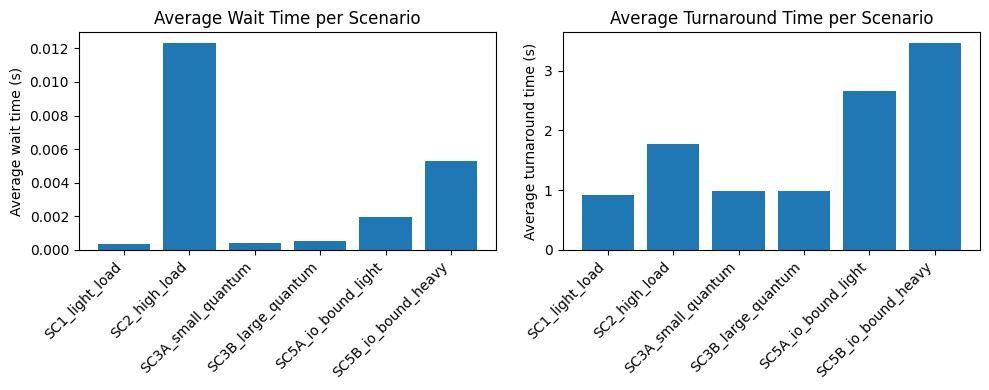

,average_wait_time,average_turnaround_time,num_jobs,boost_events,scenario
0,0.000333,0.920180,105,0,SC1_light_load
1,0.012343,1.779663,363,63,SC2_high_load
2,0.000396,0.982154,201,5,SC3A_small_quantum
3,0.000493,0.981525,201,5,SC3B_large_quantum
4,0.001926,2.658247,184,6,SC5A_io_bound_light
5,0.005302,3.469398,293,30,SC5B_io_bound_heavy



=== DETAILED TIME-SERIES PLOTS FOR EACH SCENARIO ===


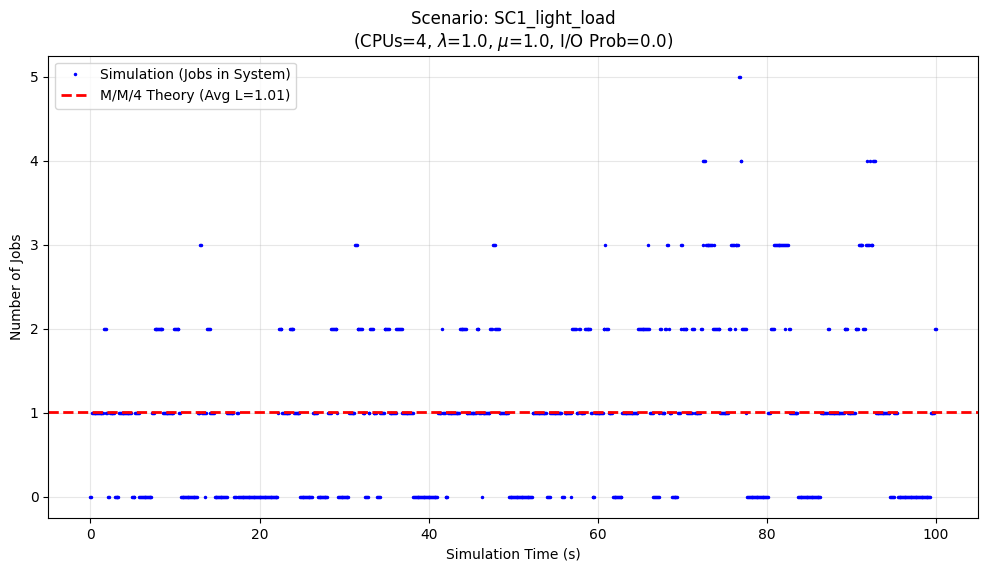

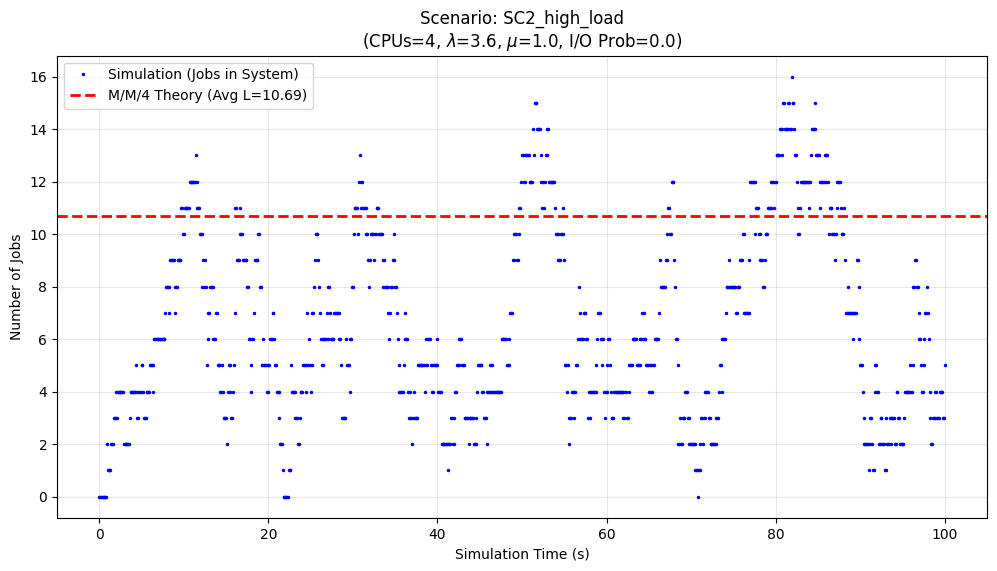

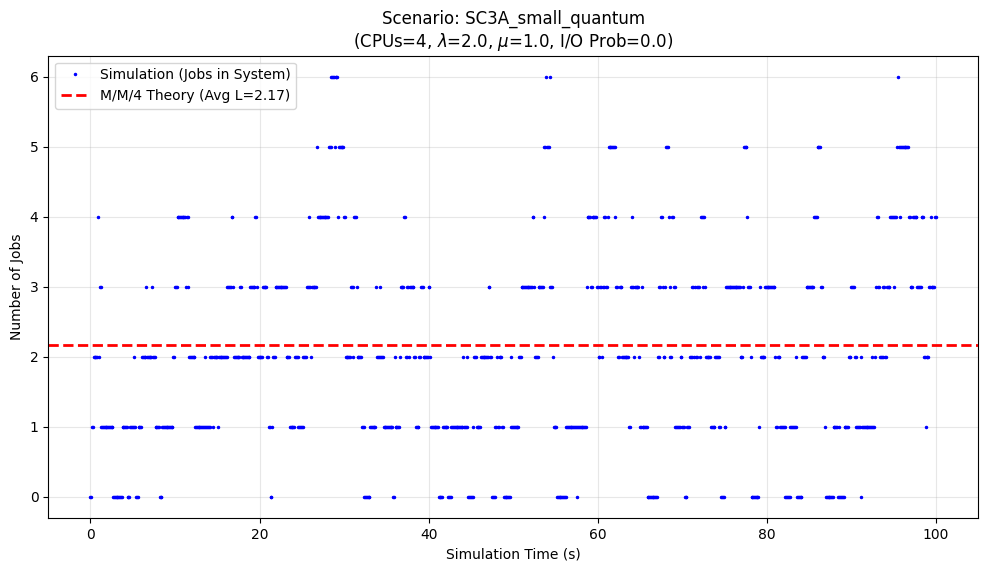

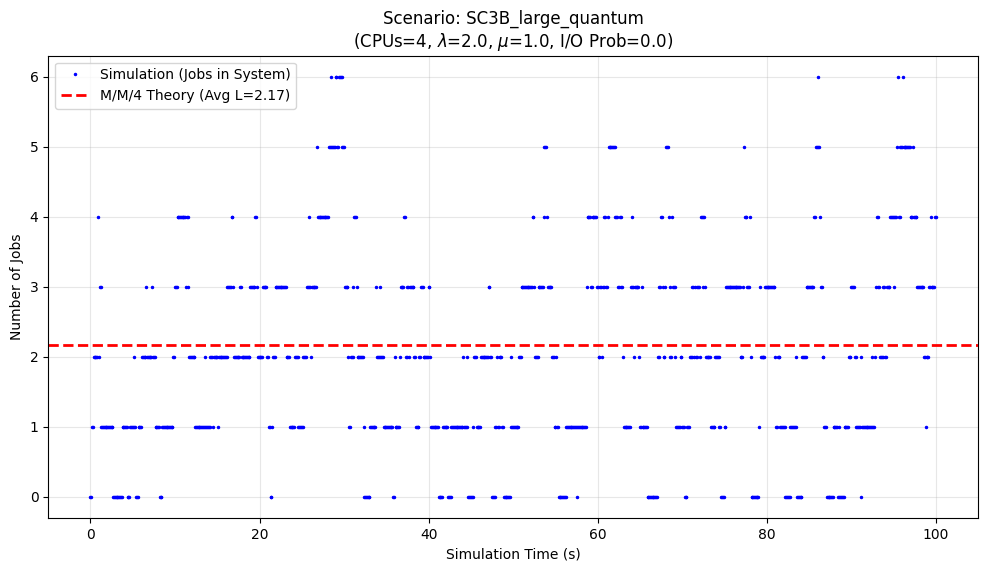

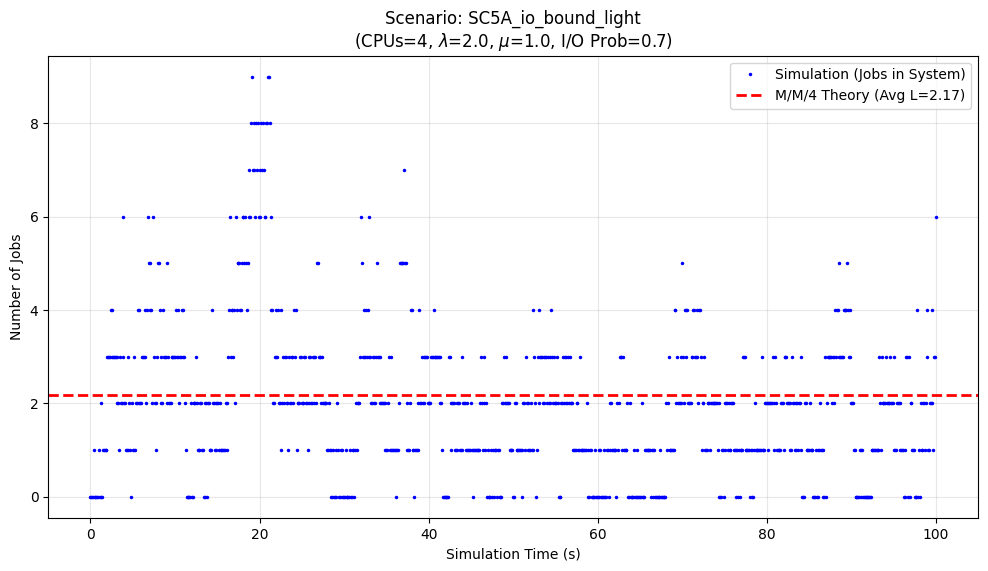

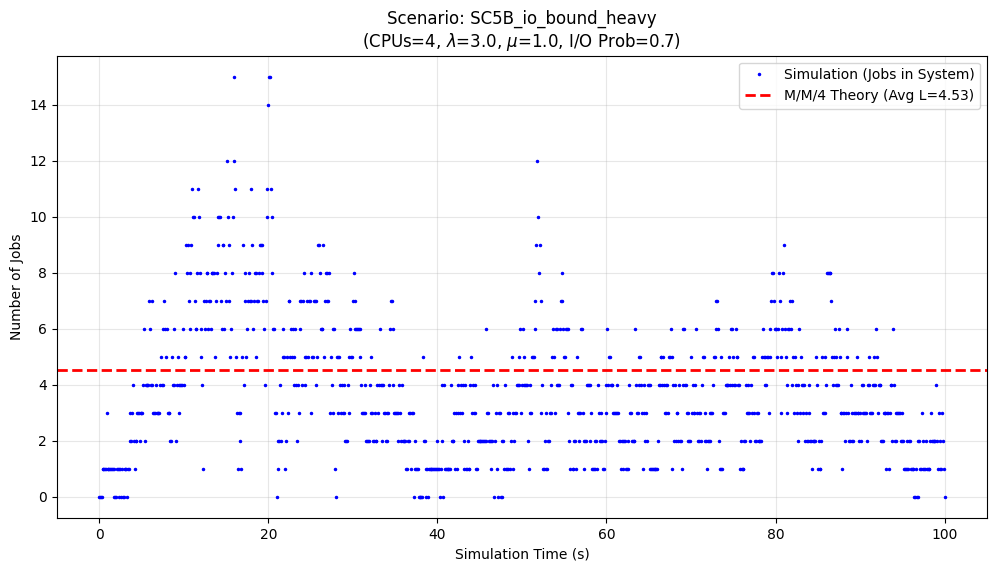


=== COMPARISON WITH M/M/c THEORY (Erlang-C) ===


,scenario,Sim_Wq,Theory_Wq,Sim_Ws,Theory_Ws
0,SC1_light_load,0.000333,0.006803,0.920180,1.006803
1,SC2_high_load,0.012343,1.969383,1.779663,2.969383
2,SC3A_small_quantum,0.000396,0.086957,0.982154,1.086957
3,SC3B_large_quantum,0.000493,0.086957,0.981525,1.086957
4,SC5A_io_bound_light,0.001926,0.086957,2.658247,1.086957
5,SC5B_io_bound_heavy,0.005302,0.509434,3.469398,1.509434


In [ ]:
# =========================
# Experiment 1: Nhiều kịch bản tải & quantum & I/O bound
# =========================

scenarios_exp1 = [
    dict(
        name="SC1_light_load",
        num_cpus=4,
        lam=1.0,
        mu=1.0,
        q1=0.05,
        q2=0.1,
        s_period=1.0,
        simulation_time=100.0,
        seed=1,
        io_probability=0.0,
        io_rate=1.0,
    ),
    dict(
        name="SC2_high_load",
        num_cpus=4,
        lam=3.6,
        mu=1.0,
        q1=0.05,
        q2=0.1,
        s_period=1.0,
        simulation_time=100.0,
        seed=2,
        io_probability=0.0,
        io_rate=1.0,
    ),
    dict(
        name="SC3A_small_quantum",
        num_cpus=4,
        lam=2.0,
        mu=1.0,
        q1=0.01,
        q2=0.02,
        s_period=1.0,
        simulation_time=100.0,
        seed=3,
        io_probability=0.0,
        io_rate=1.0,
    ),
    dict(
        name="SC3B_large_quantum",
        num_cpus=4,
        lam=2.0,
        mu=1.0,
        q1=0.2,
        q2=0.4,
        s_period=1.0,
        simulation_time=100.0,
        seed=3,
        io_probability=0.0,
        io_rate=1.0,
    ),
    dict(
        name="SC5A_io_bound_light",
        num_cpus=4,
        lam=2.0,          # tải vừa
        mu=1.0,
        q1=0.05,
        q2=0.1,
        s_period=1.0,
        simulation_time=100.0,
        seed=4,
        io_probability=0.7,  # I/O xảy ra thường xuyên
        io_rate=2.0,         # I/O tương đối nhanh
    ),
    dict(
        name="SC5B_io_bound_heavy",
        num_cpus=4,
        lam=3.0,          # tải nặng hơn
        mu=1.0,
        q1=0.05,
        q2=0.1,
        s_period=1.0,
        simulation_time=100.0,
        seed=5,
        io_probability=0.7,  # nhiều I/O
        io_rate=2.0,
    ),
]

rows = []
for cfg in scenarios_exp1:
    name = cfg["name"]
    params = {k: v for k, v in cfg.items() if k != "name"}
    res = simulate(**params)
    res["scenario"] = name
    rows.append(res)

df_exp1 = pd.DataFrame(rows)

# Plot average wait & turnaround time cho Experiment 1

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(df_exp1["scenario"], df_exp1["average_wait_time"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average wait time (s)")
plt.title("Average Wait Time per Scenario")

plt.subplot(1, 2, 2)
plt.bar(df_exp1["scenario"], df_exp1["average_turnaround_time"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average turnaround time (s)")
plt.title("Average Turnaround Time per Scenario")

plt.tight_layout()
plt.show()

display(df_exp1)

print("\n=== DETAILED TIME-SERIES PLOTS FOR EACH SCENARIO ===")
for cfg in scenarios_exp1:
    # Separate the scenario name from the parameters
    params = {k: v for k, v in cfg.items() if k != "name"}
    scenario_name = cfg["name"]

    # Invoke the new plotting function
    simulate_with_plot(scenario_name=scenario_name, **params)

def calculate_mmc_metrics(c, lam, mu):
    """
    Calculates the theoretical average waiting time (Wq) and average turnaround time (Ws)
    for an M/M/c queuing model using the Erlang-C formula.

    Args:
        c (int): Number of servers.
        lam (float): Arrival rate (lambda).
        mu (float): Service rate (mu).

    Returns:
        tuple: (Wq, Ws)
    """
    rho = lam / (c * mu)
    if rho >= 1.0:
        return float('inf'), float('inf')

    # Calculate P0 (Probability of zero jobs in the system)
    sum_k = sum([(lam/mu)**k / math.factorial(k) for k in range(c)])
    term_c = ((lam/mu)**c) / (math.factorial(c) * (1 - rho))
    P0 = 1.0 / (sum_k + term_c)

    # Calculate Lq (Average number of jobs in the queue - derived from Erlang-C)
    Lq = (P0 * ((lam/mu)**c) * rho) / (math.factorial(c) * ((1 - rho)**2))

    # Calculate Wq (Average waiting time - Little's Law)
    Wq = Lq / lam

    # Calculate Ws (Average time in system = Wq + 1/mu)
    Ws = Wq + (1.0 / mu)

    return Wq, Ws

print("\n=== COMPARISON WITH M/M/c THEORY (Erlang-C) ===")
theory_rows = []
for cfg in scenarios_exp1:
    c = cfg["num_cpus"]
    lam = cfg["lam"]
    mu = cfg["mu"]

    theory_Wq, theory_Ws = calculate_mmc_metrics(c, lam, mu)

    theory_rows.append({
        "scenario": cfg["name"],
        "Theory_Wq": theory_Wq,
        "Theory_Ws": theory_Ws
    })

df_theory = pd.DataFrame(theory_rows)

# Merge simulation results with theoretical calculations for comparison
# Note: average_wait_time corresponds to Sim_Wq, and average_turnaround_time corresponds to Sim_Ws
df_comparison = pd.merge(df_exp1[["scenario", "average_wait_time", "average_turnaround_time"]],
                         df_theory, on="scenario")

# Rename columns for clarity
df_comparison = df_comparison.rename(columns={
    "average_wait_time": "Sim_Wq",
    "average_turnaround_time": "Sim_Ws"
})

# Reorder columns for better readability
df_comparison = df_comparison[["scenario", "Sim_Wq", "Theory_Wq", "Sim_Ws", "Theory_Ws"]]

# Display the comparison table
display(df_comparison)


Experiment 2

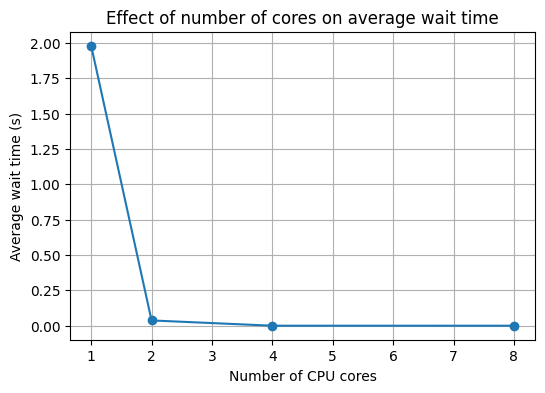

,average_wait_time,average_turnaround_time,num_jobs,boost_events,scenario,num_cpus
0,1.979183,8.878999,183,98,SC6_cores_1,1
1,0.037534,4.264338,193,88,SC6_cores_2,2
2,0.000281,1.086117,193,10,SC6_cores_4,4
3,0.000204,1.004622,193,0,SC6_cores_8,8


In [ ]:
# =========================
# Experiment 2: Thay đổi số lõi CPU
# =========================

scenarios_exp2 = []
for c in [1, 2, 4, 8]:
    scenarios_exp2.append(
        dict(
            name=f"SC6_cores_{c}",
            num_cpus=c,
            lam=2.0,
            mu=1.0,
            q1=0.05,
            q2=0.1,
            s_period=1.0,
            simulation_time=100.0,
            seed=6,
            io_probability=0.0,
            io_rate=1.0,
        )
    )

rows2 = []
for cfg in scenarios_exp2:
    name = cfg["name"]
    params = {k: v for k, v in cfg.items() if k != "name"}
    res = simulate(**params)
    res["scenario"] = name
    res["num_cpus"] = params["num_cpus"]
    rows2.append(res)

df_exp2 = pd.DataFrame(rows2)
df_exp2

plt.figure(figsize=(6, 4))
plt.plot(df_exp2["num_cpus"], df_exp2["average_wait_time"], marker="o")
plt.xlabel("Number of CPU cores")
plt.ylabel("Average wait time (s)")
plt.title("Effect of number of cores on average wait time")
plt.grid(True)
plt.show()

display(df_exp2)

# 5. Conclusions

Project coordinator provide the statements of the work's including the superior point and 2-3 limitation provided by the testing member

Nhóm 01 Silent Falcon:

*Ưu điểm:

*Nhược điểm:

Nhóm 02 Crimson Zenith:

*Ưu điểm:

*Nhược điểm:

Nhóm 03 Whispering Atlas:

*Ưu điểm:

*Nhược điểm:

Nhóm 04 Fractured Beacon:

*Ưu điểm:

*Nhược điểm:

Nhóm 05 Obsidian Serpent:

*Ưu điểm:

*Nhược điểm:

Nhóm 06 Polished Storm:

*Ưu điểm:

*Nhược điểm:

Nhóm 07 Vivid Echo:

*Ưu điểm:

*Nhược điểm:

Nhóm 08 Quantum Horizon:

*Ưu điểm:

*Nhược điểm:

Nhóm 09 Rusted Phantom:

*Ưu điểm:

*Nhược điểm:

Nhóm 10 Shifting Current:

*Ưu điểm:

*Nhược điểm:

Nhóm 11 Iron Sentinel:

*Ưu điểm:

*Nhược điểm:

Nhóm 12 Ghost Orchid:

*Ưu điểm:

*Nhược điểm:

Nhóm 13 Glacier Point:

*Ưu điểm:

*Nhược điểm:

Nhóm 14 Project Mercury:

*Ưu điểm:

*Nhược điểm:

Nhóm 15 Velvet Hammer:

*Ưu điểm:

*Nhược điểm:

Nhóm 16 Shadow Gambit:

*Ưu điểm:

*Nhược điểm:

Nhóm 17 Thunder Hawk:

*Ưu điểm:

*Nhược điểm:

Nhóm 18 Desert Serpent:

*Ưu điểm:

*Nhược điểm:

Nhóm 19 Midnight Quarry:

*Ưu điểm:

*Nhược điểm:

Nhóm 20 Dragon Protocol:

*Ưu điểm:

*Nhược điểm:

Nhóm 21 Voyager:

*Ưu điểm:

*Nhược điểm:

Nhóm 22 Zenith:

*Ưu điểm:

*Nhược điểm:

Nhóm 23 Cascade:

*Ưu điểm:

*Nhược điểm:

Nhóm 24 Nebula:

*Ưu điểm:

*Nhược điểm:

Nhóm 25 Nomad:

*Ưu điểm:

*Nhược điểm:

Nhóm 26 Phoenix:

*Ưu điểm:

*Nhược điểm:

Nhóm 27 Apex:

*Ưu điểm:

*Nhược điểm:

Nhóm 28 Horizon:

*Ưu điểm:

*Nhược điểm: